# Chapter 7. 통계학과 머신러닝

## 7.3 파이썬을 이용한 리지 회귀와 라소 회귀

### 7.3.2 분석준비

In [1]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 통계모델을 추정하는 데 사용하는 라이브러리
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 머신러닝을 적용하기 위한 라이브러리
from sklearn import linear_model

# 표시자릿수 지정
%precision 3
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

In [2]:
# 파일에서 데이터 읽기
X = pd.read_csv("./data/7-3-1-large-data.csv")
X.head(3)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_91,X_92,X_93,X_94,X_95,X_96,X_97,X_98,X_99,X_100
0,1.0000,0.5000,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,...,0.0110,0.0109,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100
1,0.5000,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,0.0909,...,0.0109,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100,0.0099
2,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,0.0909,0.0833,...,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100,0.0099,0.0098


### 7.3.3 표준화

In [3]:
# X_1 평균값
np.mean(X.X_1)

0.037

In [4]:
# 모든 설명 변수의 평균값
np.mean(X, axis = 0).head(3)

X_1    0.037272
X_2    0.030649
X_3    0.027360
dtype: float64

In [5]:
# 표준화
X -= np.mean(X, axis = 0)
X /= np.std(X, ddof = 1, axis = 0)

In [6]:
# 평균값이 0이 되었는지 확인
np.mean(X, axis = 0).head(3).round(3)

X_1   -0.0
X_2   -0.0
X_3    0.0
dtype: float64

In [7]:
# 표준편차가 1이 되었는지 확인
np.std(X, ddof = 1, axis = 0).head(3)

X_1    1.0
X_2    1.0
X_3    1.0
dtype: float64

### 7.3.4 시뮬레이션으로 종속변수 만들기

In [8]:
# 정규분포를 따르는 노이즈
np.random.seed(1)
noise =  sp.stats.norm.rvs(loc = 0, scale = 1, size = X.shape[0])

# 올바른 계수를 5라고 설정하여 종속변수 작성
y =  X.X_1 * 5 + noise

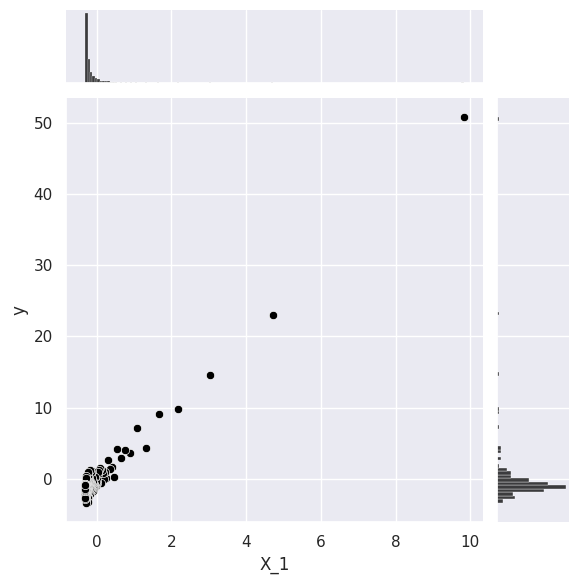

In [9]:
# 종속변수와 독립변수 합치기
large_data = pd.concat([pd.DataFrame({"y":y}), X], axis = 1)
# 그래프 그리기
sns.jointplot(y = "y", x = "X_1", data = large_data,
              color = 'black')

### 7.3.5 일반적인 최소제곱법 적용하기

In [10]:
lm_statsmodels = sm.OLS(endog = y, exog = X).fit()
lm_statsmodels.params.head(3)

X_1     14.755018
X_2    -87.462851
X_3    211.743136
dtype: float64

### 7.3.6 sklearn을 이용한 선형회귀

In [11]:
# 어떤 모델을 만들지 지정
lm_sklearn = linear_model.LinearRegression()
# 데이터를 지정하여 모델을 추정
lm_sklearn.fit(X, y)
# 추정된 파라미터(array형)
lm_sklearn.coef_

array([ 1.476e+01, -8.746e+01,  2.117e+02, -9.415e+01, -6.817e+01,
       -9.284e+01,  1.761e+00,  8.170e+01,  6.680e+01,  2.788e+01,
       -3.288e+01,  6.818e+01, -1.699e+01,  2.208e+01, -4.855e+01,
       -3.390e+01, -4.536e+01,  9.728e+00,  2.481e+01,  1.858e+00,
        1.599e+00, -2.838e+01,  6.477e+00, -5.980e+01,  3.532e+01,
       -1.302e+01,  4.108e+01, -4.303e+01,  5.247e+01,  1.920e+00,
        3.342e+01,  8.490e+00,  8.329e+00, -2.293e+01, -3.577e+01,
       -1.337e+01,  3.178e+01, -2.018e+01, -2.654e+01, -3.523e+01,
        1.927e+01,  4.823e+01, -1.655e+00,  5.749e-01, -1.893e+01,
        7.370e-01,  1.047e+01, -7.732e+00, -1.854e+00, -2.559e-01,
       -5.045e+00, -4.227e+00,  2.523e+01,  1.616e+01, -1.310e+01,
        6.455e+00, -1.332e+01, -2.291e+01, -1.202e+01,  7.745e+00,
        1.755e+01,  5.997e+00,  4.648e+00,  4.120e+00, -1.825e+00,
        5.366e+00,  4.546e+00, -2.598e+00, -4.091e+00,  7.496e+00,
        3.100e+01,  1.530e+01, -5.323e+00, -1.509e+01, -3.801e

### 7.3.7 리지회귀 - 벌칙항의 영향

In [12]:
# α가 주는 영향
n_alphas = 50
ridge_alphas = np.logspace(-2, 0.7, n_alphas)

In [13]:
# 참고
np.log10(ridge_alphas)

array([-2.   , -1.945, -1.89 , -1.835, -1.78 , -1.724, -1.669, -1.614,
       -1.559, -1.504, -1.449, -1.394, -1.339, -1.284, -1.229, -1.173,
       -1.118, -1.063, -1.008, -0.953, -0.898, -0.843, -0.788, -0.733,
       -0.678, -0.622, -0.567, -0.512, -0.457, -0.402, -0.347, -0.292,
       -0.237, -0.182, -0.127, -0.071, -0.016,  0.039,  0.094,  0.149,
        0.204,  0.259,  0.314,  0.369,  0.424,  0.48 ,  0.535,  0.59 ,
        0.645,  0.7  ])

In [14]:
# 추정한 회귀계수를 저장할 리스트
ridge_coefs = []
# for루프로 리지 회귀를 추정
for a in ridge_alphas:
    ridge = linear_model.Ridge(alpha = a, fit_intercept = False)
    ridge.fit(X, y)
    ridge_coefs.append(ridge.coef_)

In [15]:
# 배열로 변환
ridge_coefs = np.array(ridge_coefs)
ridge_coefs.shape

(50, 100)

(-8.000, 10.500)

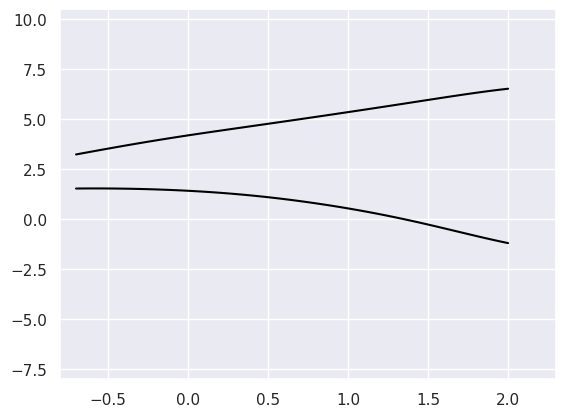

In [16]:
# 참고
log_alphas = -np.log10(ridge_alphas)
plt.plot(log_alphas, ridge_coefs[::,0], color = 'black')
plt.plot(log_alphas, ridge_coefs[::,1], color = 'black')

plt.xlim([min(log_alphas)-0.1, max(log_alphas) + 0.3])
plt.ylim([-8, 10.5])

Text(0, 0.5, 'Coefficients')

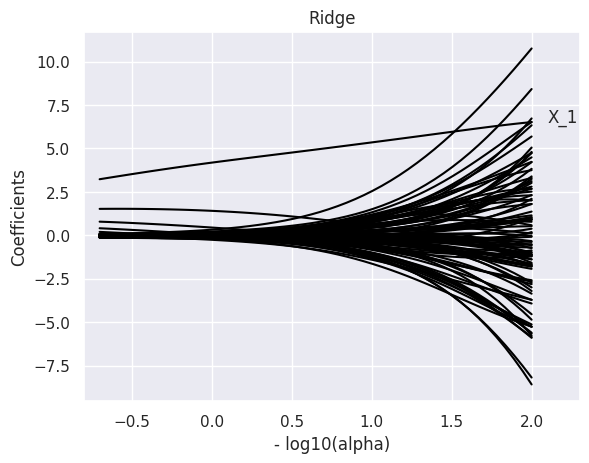

In [17]:
# 横軸に-log10(α)、縦軸に係数を置いた折れ線グラフ
# 100回繰り返さなくても、自動で線を100本引いてくれる

# α를 변환
log_alphas = -np.log10(ridge_alphas)
# 가로축을 -log10(α)、세로축을 계수로 하는 그래프
plt.plot(log_alphas, ridge_coefs, color = 'black')
# 독립변수 X_1dml 계수를 알기 쉽게 표시
plt.text(max(log_alphas) + 0.1, np.array(ridge_coefs)[0,0], "X_1")
# X축의 범위
plt.xlim([min(log_alphas) - 0.1, max(log_alphas) + 0.3])
# 축 레이블
plt.title("Ridge")
plt.xlabel("- log10(alpha)")
plt.ylabel("Coefficients")

### 7.3.8 리지회귀 - 최적의 정규화 강도 결정

In [18]:
# CV에서 최적의 α를 구함
ridge_best = linear_model.RidgeCV(
    cv = 10, alphas = ridge_alphas, fit_intercept = False)
ridge_best.fit(X, y) 

#최적의 -log10(α)
-np.log10(ridge_best.alpha_)

0.237

In [19]:
# 적합한 α
ridge_best.alpha_

0.580

In [20]:
# 추정된 계수
ridge_best.coef_

array([ 4.463,  1.288,  0.293, -0.091, -0.201, -0.233, -0.215, -0.206,
       -0.145, -0.135, -0.155, -0.046, -0.097, -0.017, -0.11 , -0.012,
       -0.094,  0.013, -0.018, -0.031,  0.025, -0.029,  0.043, -0.087,
        0.127,  0.021,  0.055, -0.077,  0.141, -0.007,  0.099,  0.116,
       -0.044,  0.037, -0.034,  0.015,  0.123, -0.171, -0.007, -0.182,
        0.09 ,  0.222,  0.035, -0.032, -0.008,  0.025,  0.338, -0.193,
       -0.108,  0.212, -0.128, -0.246,  0.249,  0.128, -0.155,  0.27 ,
        0.03 , -0.165, -0.178,  0.158, -0.011,  0.013,  0.194,  0.134,
       -0.156, -0.018,  0.256,  0.223, -0.185,  0.006,  0.535,  0.181,
       -0.348, -0.123,  0.226, -0.043, -0.115, -0.053,  0.209,  0.189,
       -0.042, -0.205, -0.099,  0.059, -0.224,  0.15 , -0.039, -0.113,
        0.21 ,  0.012,  0.129, -0.032, -0.022, -0.229, -0.198,  0.245,
       -0.305, -0.396, -0.163,  0.164])

### 7.3.9 라소 회귀 - 벌칙항의 영향

In [21]:
# α를 다양하게 변화시켜 라소회귀 수행
lasso_alphas, lasso_coefs, _ = linear_model.lasso_path(
    X, y, fit_intercept = False)

ValueError: ('Unexpected parameters in params', dict_keys(['fit_intercept']))

In [22]:
# α를 변환
log_alphas = -np.log10(lasso_alphas)
# 가로축을 -log10(α)、세로축을 계수로 하는 그래프
plt.plot(log_alphas, lasso_coefs.T, color = 'black')
# 독립변수 X_1의 계수를 알기 쉽게 표시
plt.text(max(log_alphas) + 0.1, lasso_coefs[0, -1], "X_1")
# X축의 범위
plt.xlim([min(log_alphas)-0.1, max(log_alphas) + 0.3])
# 축 레이블
plt.title("Lasso")
plt.xlabel("- log10(alpha)")
plt.ylabel("Coefficients")

NameError: name 'lasso_alphas' is not defined

In [23]:
# CV로 최적의 α를 구함
lasso_best = linear_model.LassoCV(
    cv = 10, alphas = lasso_alphas, fit_intercept = False)
lasso_best.fit(X, y)

# 최적의 -log(α)
-np.log10(lasso_best.alpha_)

NameError: name 'lasso_alphas' is not defined

In [31]:
# 최적의 α
lasso_best.alpha_

0.004999848237729944

In [32]:
# 최적의 α의 때의 회귀 계수
lasso_best.coef_

array([ 5.336e+00, -0.000e+00, -0.000e+00, -3.043e-01, -4.121e-02,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00,  0.000e+00, -0.000e+00,
        0.000e+00,  0.000e+00, -0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00, -0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        8.425e-03,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e